## import required packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## load the data

In [2]:
df = pd.read_csv('./universities_std.csv')

## Exploratory Data Analysis

In [3]:
df.head()

,Unnamed: 0,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0,0.743902,0.847222,0.105263,0.368421,0.255144,0.900000
1,1,1.000000,1.000000,0.144737,0.000000,1.000000,0.466667
2,2,0.621951,0.472222,0.592105,0.157895,0.297461,0.166667
3,3,0.743902,0.666667,0.131579,0.315789,0.415629,0.700000
4,4,0.670732,0.763889,0.250000,0.368421,0.239835,0.766667


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  25 non-null     int64  
 1   SAT         25 non-null     float64
 2   Top10       25 non-null     float64
 3   Accept      25 non-null     float64
 4   SFRatio     25 non-null     float64
 5   Expenses    25 non-null     float64
 6   GradRate    25 non-null     float64
dtypes: float64(6), int64(1)
memory usage: 1.5 KB


In [5]:
df.describe()

,Unnamed: 0,SAT,Top10,Accept,SFRatio,Expenses,GradRate
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,12.000000,0.637659,0.673333,0.331579,0.353684,0.340508,0.657333
std,7.359801,0.264292,0.269915,0.259570,0.214071,0.262887,0.301926
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,0.573171,0.638889,0.131579,0.263158,0.117293,0.466667
50%,12.000000,0.682927,0.736111,0.289474,0.315789,0.343515,0.766667
75%,18.000000,0.817073,0.861111,0.473684,0.421053,0.476864,0.900000
max,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Data Pre-processing

In [6]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [7]:
df.columns

Index(['SAT', 'Top10', 'Accept', 'SFRatio', 'Expenses', 'GradRate'], dtype='object')

## Create hierarchical clusters

In [8]:
from scipy.cluster import hierarchy

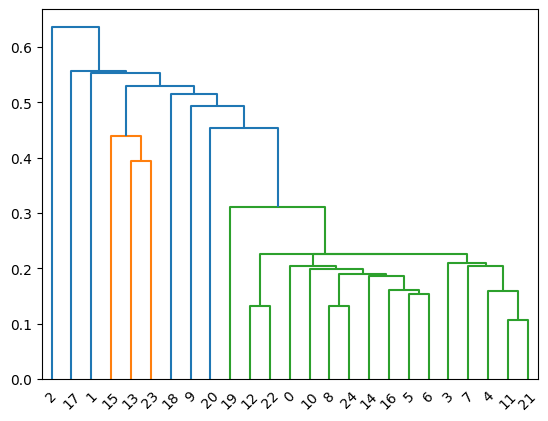

In [9]:
# use single likage for creating hiearchies
linkage = hierarchy.linkage(df, 'single')

# create dendrogram using linkage
clusters_info = hierarchy.dendrogram(linkage)

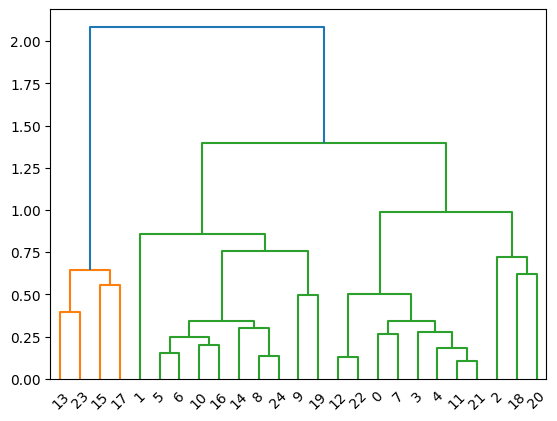

In [10]:
# use single likage for creating hiearchies
linkage = hierarchy.linkage(df, 'complete')

# create dendrogram using linkage
clusters_info = hierarchy.dendrogram(linkage)

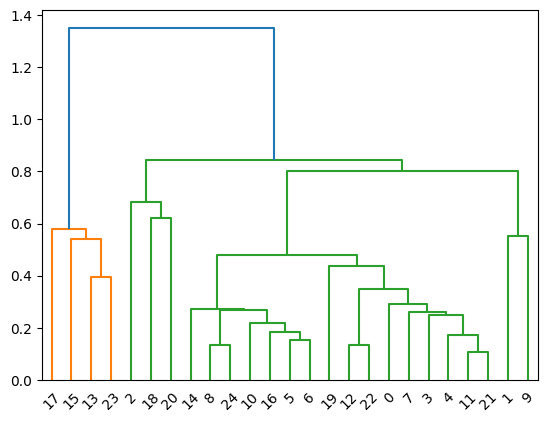

In [11]:
# use single likage for creating hiearchies
linkage = hierarchy.linkage(df, 'average')

# create dendrogram using linkage
clusters_info = hierarchy.dendrogram(linkage)

## using Sci-Kit Learn

In [12]:
from sklearn.cluster import AgglomerativeClustering

# create an object of AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=5, linkage='complete')

# fit the data
model.fit(df)

AgglomerativeClustering(linkage='complete', n_clusters=5)

In [13]:
model.n_clusters_

5

In [14]:
model.labels_

array([3, 4, 2, 3, 3, 0, 0, 3, 0, 0, 0, 3, 3, 1, 0, 1, 0, 1, 2, 0, 2, 3,
       3, 1, 0])

Text(0, 0.5, 'GradRate')

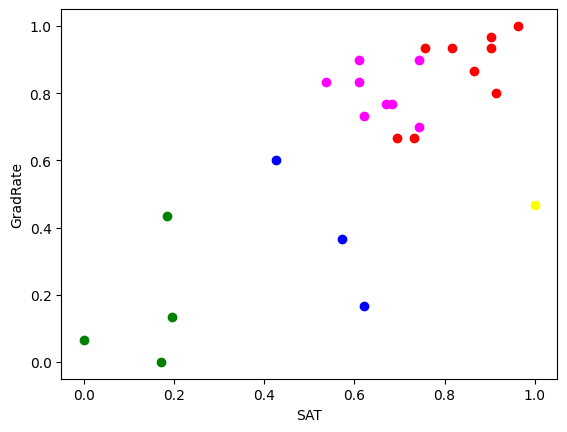

In [15]:

# create a figure using plt
figure = plt.figure()

colors = ['red', 'green', 'blue', 'magenta', 'yellow']
for index in range(len(colors)):
    plt.scatter(df['SAT'][model.labels_ == index], df['GradRate'][model.labels_ == index], color=colors[index])

plt.xlabel('SAT')
plt.ylabel('GradRate')

Text(0.5, 0.5, 'GradRate')

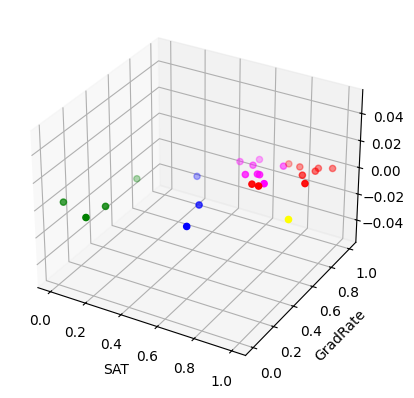

In [16]:
# create a figure using plt
figure = plt.figure()

# add a subplot
ax = figure.add_subplot(111, projection='3d')

colors = ['red', 'green', 'blue', 'magenta', 'yellow']
for index in range(len(colors)):
    ax.scatter(df['SAT'][model.labels_ == index], df['GradRate'][model.labels_ == index], color=colors[index])

plt.xlabel('SAT')
plt.ylabel('GradRate')